<a href="https://www.kaggle.com/code/humagonen/raisin-class-prediction-with-logistic-regression?scriptVersionId=184899731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:darkorange;font-family:newtimeroman;font-size:180%;color:white;text-align:center;border-radius:60px 0px;"><b> Raisin Class Prediction with Logistic Regression

## Steps in this Notebook:

- Intro and imports

- Exploratory Data Analysis

- Modelling with Logistic Regression

- Model Evaluation

- Final Model

# <div style="color:white;border-radius:80px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 1) Intro</p></div> 

## Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


## Attribute Information:

1. **Area:** Gives the number of pixels within the boundaries of the raisin.

2. **Perimeter:** It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.

3. **MajorAxisLength:** Gives the length of the main axis, which is the longest line that can be drawn on the raisin.

4. **MinorAxisLength:** Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.

5. **Eccentricity:** It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.

6. **ConvexArea:** Gives the number of pixels of the smallest convex shell of the region formed by the raisin.

7. **Extent:** Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.

8. **Class:** Kecimen and Besni raisin.

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

https://dergipark.org.tr/en/download/article-file/1227592

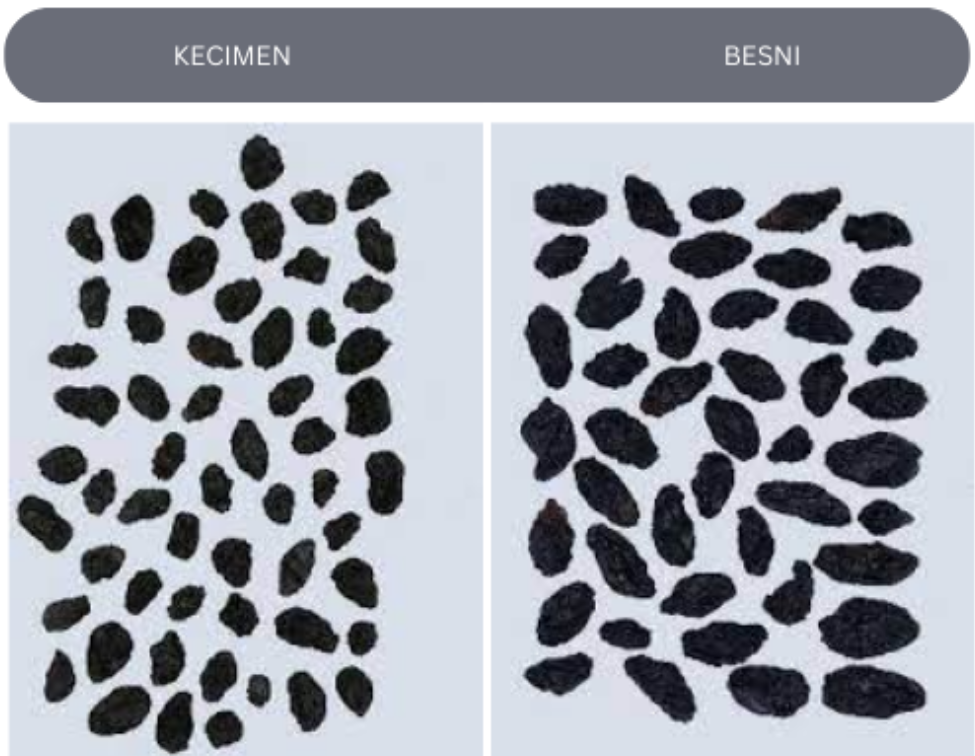

# <div style="color:white;border-radius:80px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 2) Import Libraries</p></div> 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="color:white;border-radius:80px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 3) Exploratory Data Analysis</p></div> 

In [3]:
df0 = pd.read_excel("/kaggle/input/raisin-dataset/Raisin_Dataset/Raisin_Dataset.xlsx")
df = df0.copy()
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [4]:
# Basic info about the dataset

print('Dataset shape: ', df.shape)
print('_______________________________________________________\n')
print(df.info())
print('_______________________________________________________')
df.describe().T

Dataset shape:  (900, 8)
_______________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None
_______________________________________________________


,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [5]:
df.describe(include="object").T

,count,unique,top,freq
Class,900,2,Kecimen,450


In [6]:
df['Class'].value_counts() # NOICE!  balanced data

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

## Duplicate Check

In [7]:
# checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


## Missing Value Check

In [8]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

missing_values(df)

,Missing_Number,Missing_Percent


# Visualize

In [9]:
import plotly.express as px

features = df.columns[:-1]
for i in features:
    fig = px.box(df, x=i, y= df.Class)
    fig.show()

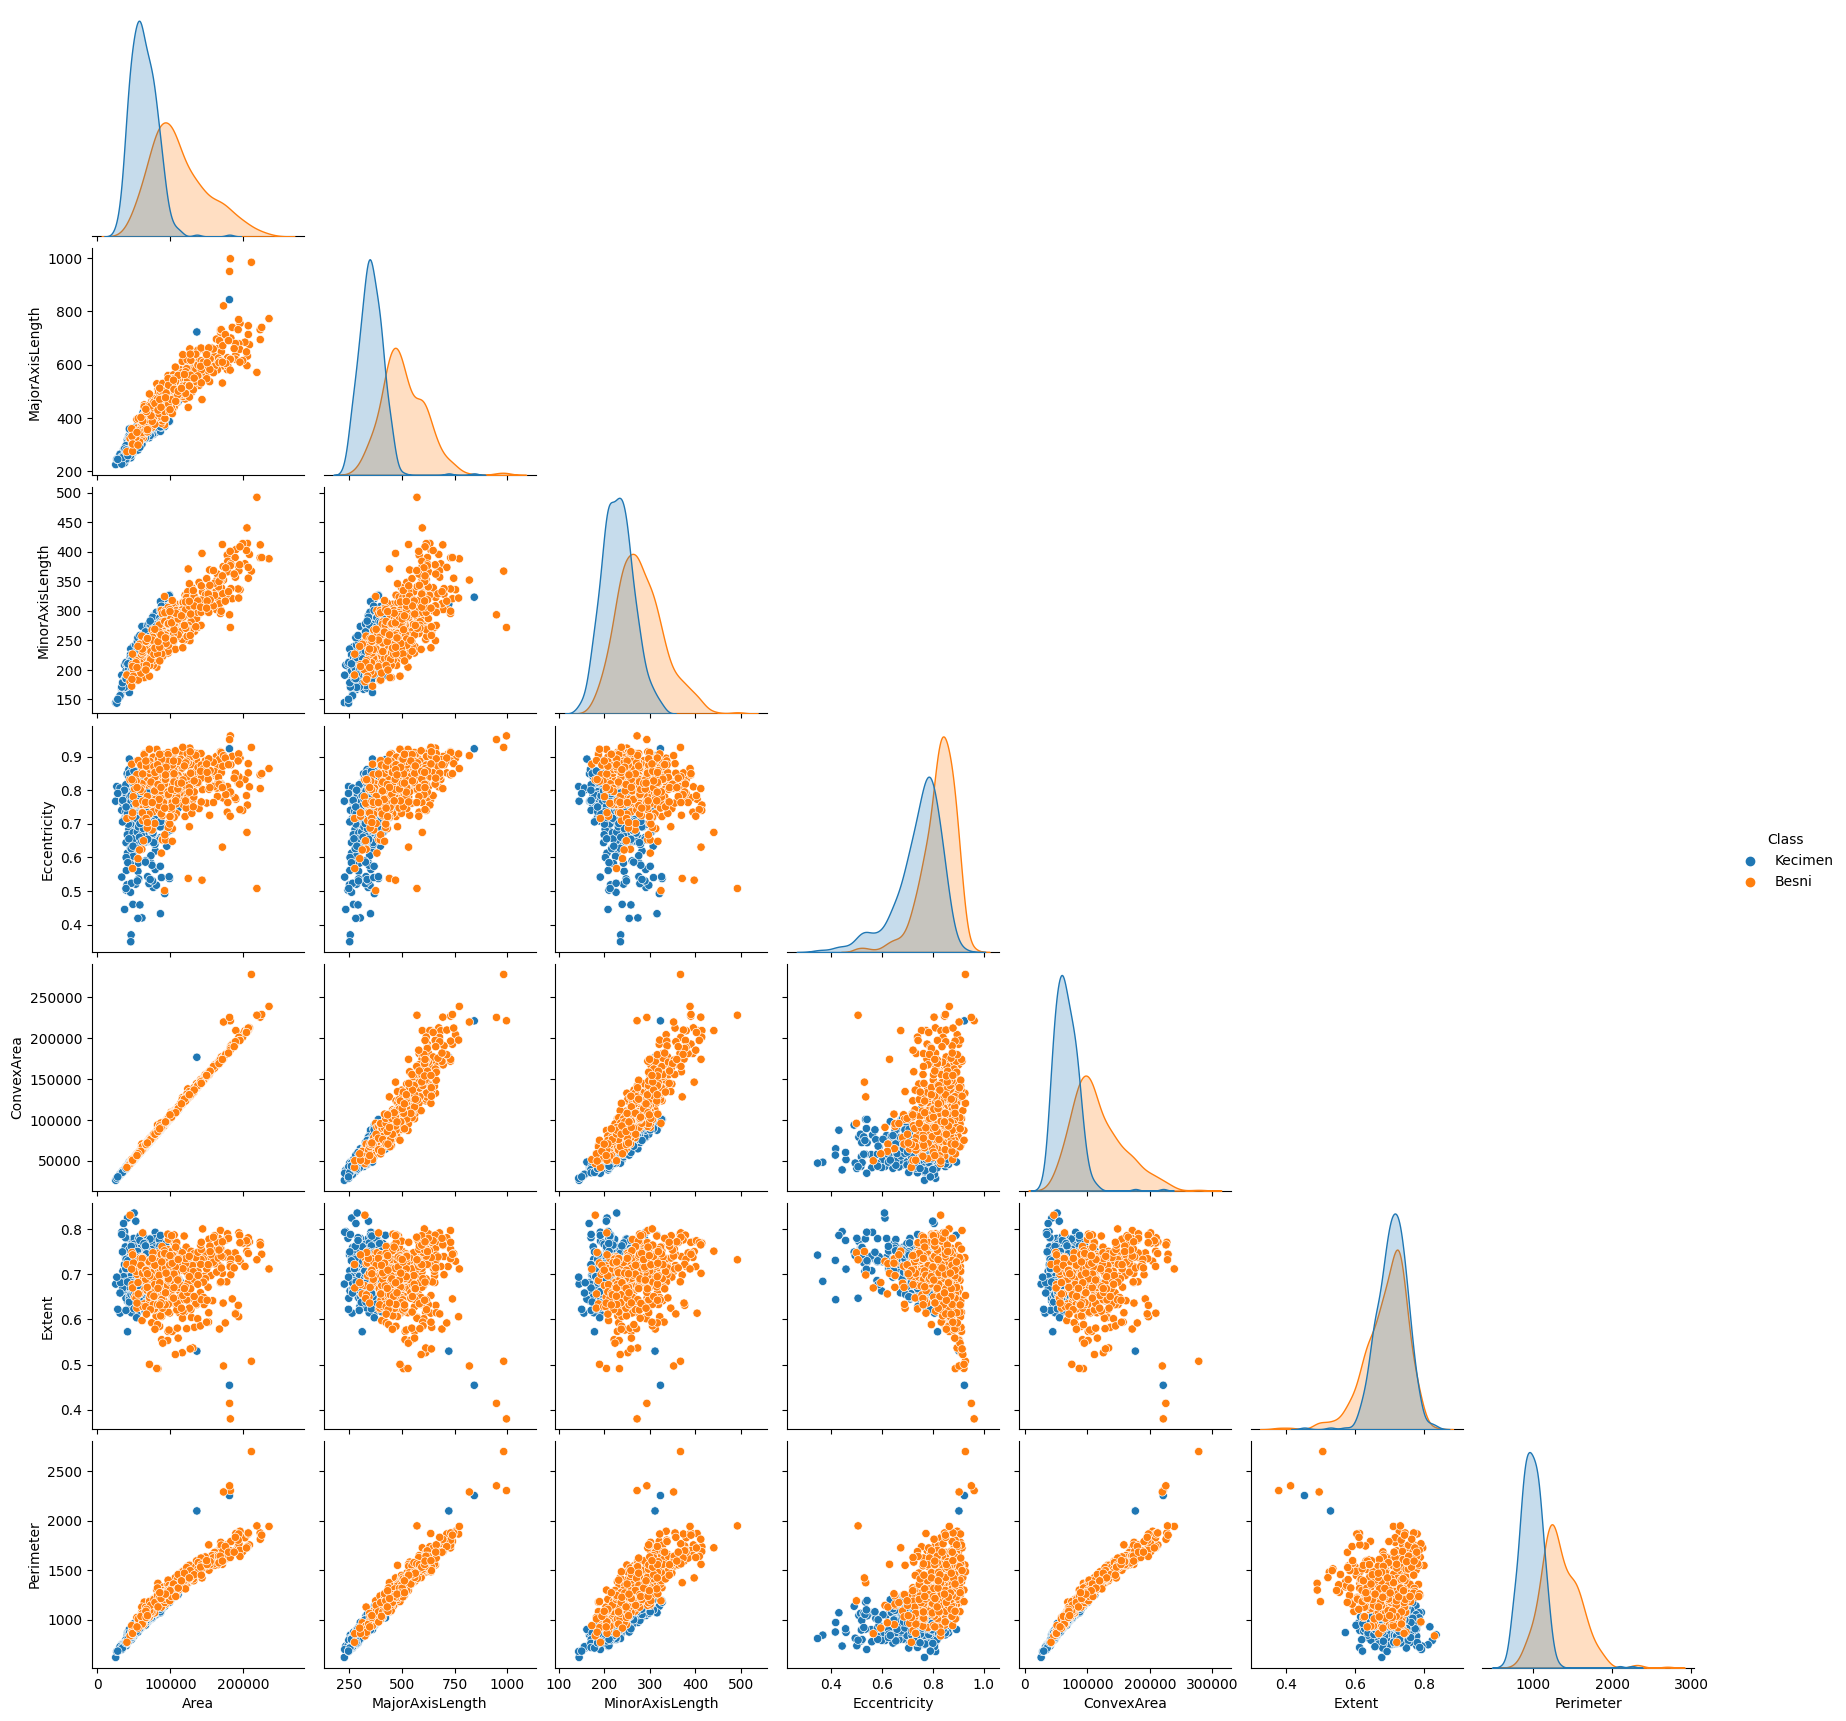

In [10]:
sns.pairplot(data=df, corner=True, hue='Class');

# Mapping Target Values

In [11]:
df["class_number"] = df['Class'].map({'Kecimen': 1, 'Besni': 0})

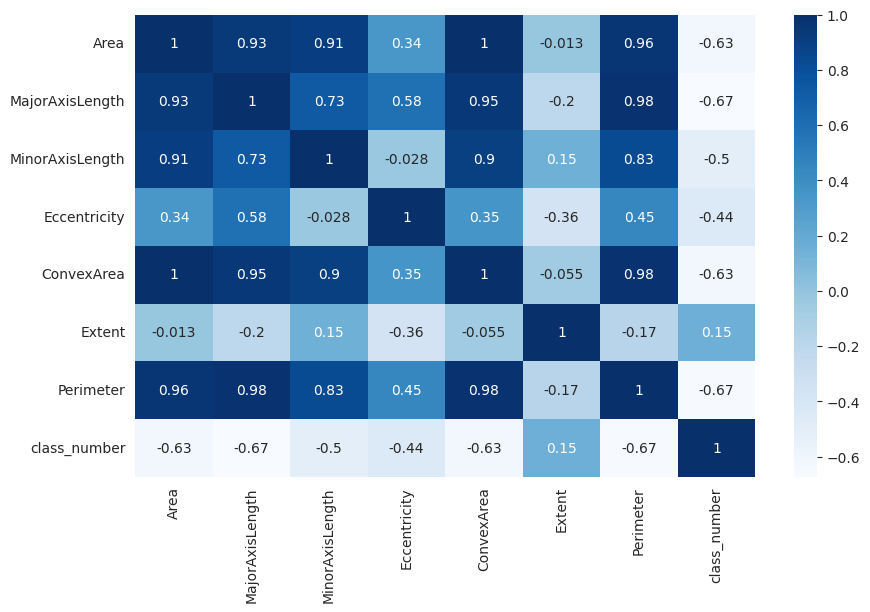

In [112]:
sns.heatmap(df.select_dtypes('number').corr(), cmap= 'Blues', annot=True);

In [113]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'class_number'],
      dtype='object')

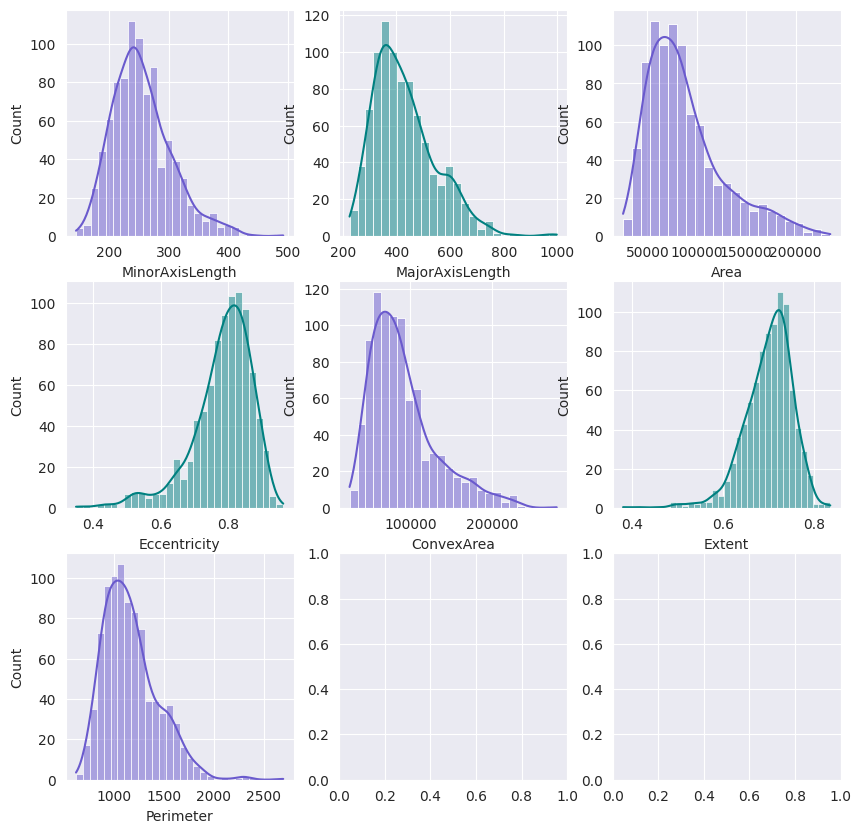

In [114]:
# Reset seaborn style to default
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="MinorAxisLength", ax=ax[0][0], kde=True, color='slateblue')

sns.histplot(data=df, x="MajorAxisLength", ax=ax[0][1], kde=True, color='teal')

sns.histplot(data=df, x="Area", ax=ax[0][2], kde=True, color='slateblue')

sns.histplot(data=df, x="Eccentricity", ax=ax[1][0], kde=True, color='teal')

sns.histplot(data=df, x="ConvexArea", ax=ax[1][1], kde=True, color='slateblue')

sns.histplot(data=df, x="Extent", ax=ax[1][2], kde=True, color='teal')

sns.histplot(data=df, x="Perimeter", ax=ax[2][0], kde=True, color='slateblue')

# Show the plot
plt.show()

# <div style="color:white;border-radius:80px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 4) Preprocessing Data </p></div> 

# Train | Test Split and Scaling

In [115]:
df.drop('Class', axis= 1, inplace = True)

In [116]:
X = df.drop('class_number', axis= 1)
y = df['class_number']

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=10)

In [119]:
scaler = StandardScaler()

In [120]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <div style="color:white;border-radius:80px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 5) Modelling</p></div> 

# Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [122]:
log_model.coef_ 

array([[-0.57698769, -0.60536899,  0.35849773, -0.32030978, -0.28784162,
         0.22249487, -1.94482086]])

In [123]:
log_model.intercept_

array([-0.49487081])

In [124]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0])

In [125]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.68770761e-02, 9.03122924e-01],
       [1.47917884e-01, 8.52082116e-01],
       [9.70576861e-01, 2.94231390e-02],
       [9.95679918e-01, 4.32008196e-03],
       [7.61153454e-03, 9.92388465e-01],
       [7.24741935e-01, 2.75258065e-01],
       [8.77882784e-02, 9.12211722e-01],
       [9.84081894e-01, 1.59181055e-02],
       [9.84614566e-01, 1.53854343e-02],
       [2.17642086e-01, 7.82357914e-01],
       [6.16558164e-02, 9.38344184e-01],
       [9.98764093e-01, 1.23590733e-03],
       [3.07053746e-02, 9.69294625e-01],
       [1.07726651e-01, 8.92273349e-01],
       [8.56440832e-02, 9.14355917e-01],
       [1.18393333e-01, 8.81606667e-01],
       [1.44871620e-01, 8.55128380e-01],
       [8.48978884e-01, 1.51021116e-01],
       [1.32696782e-01, 8.67303218e-01],
       [5.34453584e-01, 4.65546416e-01],
       [7.91573065e-01, 2.08426935e-01],
       [7.54375741e-01, 2.45624259e-01],
       [1.68228957e-01, 8.31771043e-01],
       [4.81360218e-01, 5.18639782e-01],
       [9.994938

In [126]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba_rounded = np.round(y_pred_proba, 2)  # e'li değerleri normal değerlere cevirdik
y_pred_proba_rounded

array([[0.1 , 0.9 ],
       [0.15, 0.85],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.72, 0.28],
       [0.09, 0.91],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.22, 0.78],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.11, 0.89],
       [0.09, 0.91],
       [0.12, 0.88],
       [0.14, 0.86],
       [0.85, 0.15],
       [0.13, 0.87],
       [0.53, 0.47],
       [0.79, 0.21],
       [0.75, 0.25],
       [0.17, 0.83],
       [0.48, 0.52],
       [1.  , 0.  ],
       [0.53, 0.47],
       [0.13, 0.87],
       [0.02, 0.98],
       [0.89, 0.11],
       [0.15, 0.85],
       [0.05, 0.95],
       [0.38, 0.62],
       [0.89, 0.11],
       [0.08, 0.92],
       [0.62, 0.38],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.08, 0.92],
       [0.27, 0.73],
       [0.12, 0.88],
       [0.08, 0.92],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.76,

In [127]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data["pred"] = y_pred
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,class_number,pred_proba,pred
825,61556,340.784,231.435,0.734,63181,0.735,956.302,0,0.903,1
343,65740,348.881,245.976,0.709,69233,0.741,1036.517,1,0.852,1
810,123654,542.420,293.473,0.841,126325,0.660,1400.524,0,0.029,0
527,163442,594.759,351.426,0.807,167471,0.705,1621.959,0,0.004,0
236,46845,264.967,225.842,0.523,47739,0.759,799.991,1,0.992,1
...,...,...,...,...,...,...,...,...,...,...
523,110897,518.788,275.261,0.848,115550,0.730,1365.577,0,0.061,0
512,101661,440.982,295.531,0.742,105429,0.713,1268.050,0,0.272,0
742,107082,536.852,258.717,0.876,112201,0.730,1354.715,0,0.052,0
58,69060,328.489,275.889,0.543,72223,0.727,1039.551,1,0.927,1


In [128]:
#tüm hataları listeledik

wrong_predict = test_data[((test_data["class_number"]==1) & (test_data["pred"]==0)) | ((test_data["class_number"]==0) & (test_data["pred"]==1))]
wrong_predict

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,class_number,pred_proba,pred
825,61556,340.784,231.435,0.734,63181,0.735,956.302,0,0.903,1
585,61444,371.694,213.180,0.819,64321,0.737,1006.984,0,0.782,1
706,60674,345.315,225.219,0.758,62614,0.736,987.617,0,0.867,1
396,75431,433.671,222.999,0.858,78125,0.723,1103.236,1,0.466,0
136,97026,455.972,273.054,0.801,99561,0.671,1212.667,1,0.246,0
839,68510,348.401,252.993,0.688,70513,0.671,1028.839,0,0.832,1
606,78304,390.973,262.770,0.740,82394,0.623,1137.706,0,0.519,1
170,84260,411.397,262.974,0.769,85978,0.687,1157.001,1,0.471,0
838,92619,398.621,296.883,0.667,95666,0.743,1173.390,0,0.622,1
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,1,0.377,0


In [129]:
wrong_predict.shape

(29, 10)

# Confusion Matrix

- True Negative (TN): top left
- False Positive (FP): top right
- False Negative (FN): bottom left
- True Positive (TP): bottom right

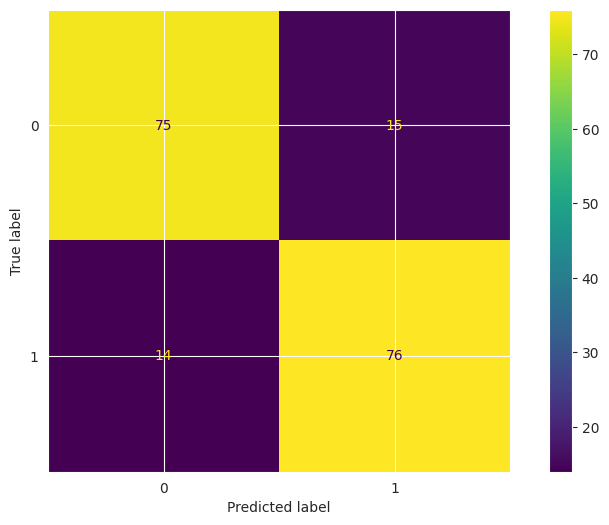

In [130]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

In [131]:
# EXAMPLE performance calculation from confusion matrix:

TP = 10
TN = 70
FP = 0
FN = 10

acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recc = TP / (TP + FN)
F1 = 2 * ((prec * recc) / (prec + recc))

print("Accuracy : {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall   : {:.2f}".format(recc))
print("F1 Score : {:.2f}".format(F1))

Accuracy : 0.89
Precision: 1.00
Recall   : 0.50
F1 Score : 0.67


# Vanilla Model Performance

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [133]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [134]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        90
           1       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[307  53]
 [ 36 324]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       360
           1       0.86      0.90      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



# Cross Validate

In [135]:
from sklearn.model_selection import cross_validate

In [136]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [137]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring= ['accuracy', 
                                  'precision', 
                                  'recall', 
                                  'f1'], cv = 10)

df.scores = pd.DataFrame(scores, index= range(1,11))
df.scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.009,0.009,0.917,0.895,0.944,0.919
2,0.007,0.008,0.889,0.850,0.944,0.895
3,0.007,0.008,0.875,0.886,0.861,0.873
4,0.007,0.008,0.917,0.917,0.917,0.917
5,0.007,0.008,0.833,0.816,0.861,0.838
6,0.007,0.008,0.861,0.933,0.778,0.848
7,0.007,0.008,0.889,0.850,0.944,0.895
8,0.007,0.008,0.847,0.821,0.889,0.853
9,0.007,0.007,0.847,0.805,0.917,0.857
10,0.007,0.008,0.903,0.854,0.972,0.909


In [138]:
df.scores.mean()[2:]

test_accuracy    0.878
test_precision   0.863
test_recall      0.903
test_f1          0.880
dtype: float64

# GridSearchCV

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
model = LogisticRegression(max_iter = 1000)

penalty = ['l1', 'l2'] # lasso, ridge
C = np.logspace(-1, 5, 10) # katsayi icin logspace alinarak degerler verilmesi oneriliyor
class_weight = ['balanced', None]
solver = ['lbfgs', 'liblinear', 'sag', 'saga']

param_grid = {'penalty': penalty,
             'C': C,
             'class_weight': class_weight,
             'solver': solver}

grid_model = GridSearchCV(estimator=model, param_grid= param_grid, cv=10,
                          scoring= 'accuracy',
                          n_jobs= -1)

In [142]:
grid_model.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [143]:
grid_model.best_params_

{'C': 0.46415888336127786,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [144]:
grid_model.best_score_

0.8777777777777779

In [145]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        90
           1       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[305  55]
 [ 34 326]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       360
           1       0.86      0.91      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



# ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [146]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

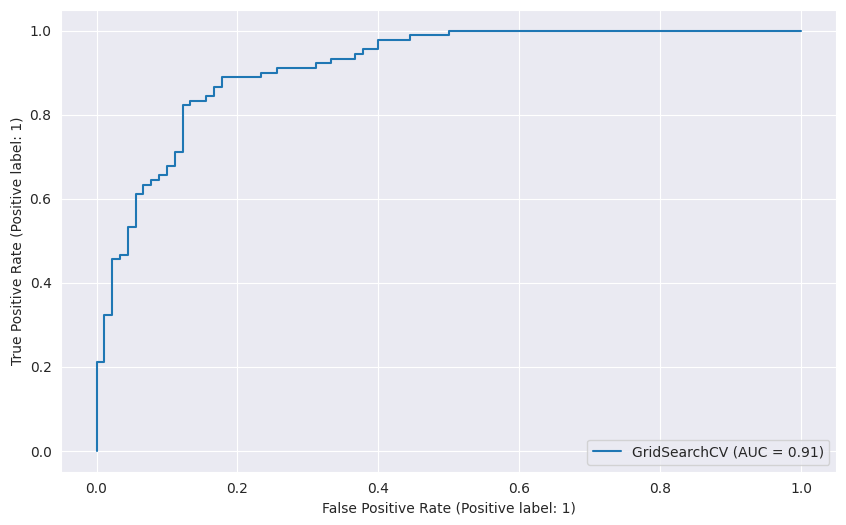

In [147]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test);

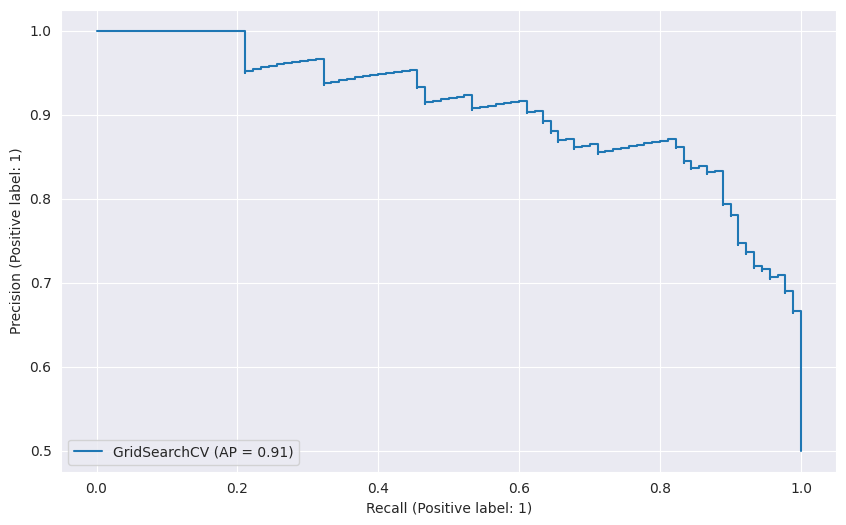

In [148]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test);

# <div style="color:white;border-radius:80px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> 6) Final Model</p></div> 

In [149]:
scaler = StandardScaler().fit(X)

In [150]:
import pickle

pickle.dump(scaler, open('scaler_raisin', 'wb'))

In [151]:
X_scaled = scaler.transform(X)

In [152]:
final_model = LogisticRegression(C= 0.1, class_weight='balanced', 
                                         penalty= 'l1',
                                         solver='liblinear').fit(X_scaled, y)

In [153]:
# save model

pickle.dump(final_model, open('final_model_raisin', 'wb'))

In [154]:
import gc

del fig

In [156]:
gc.collect()

0

# <div style="color:white;border-radius:10px;background-color:darkorange;font-family:Nexa;overflow:hidden"><p style="padding:3px;color:white;text-align:center;overflow:hidden;font-size:150%;letter-spacing:0.5px;margin:0"><b> </b> Thank You! </p></div> 